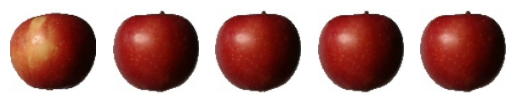

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imgaug.augmenters as iaa


input_img = "D:\Code\Python\TH_TXLDL\Fruits360_Lab4\Training"

def resize_image(image, width=None, height=None):
    if width is None and height is None:
        return image
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized



list_img = []

for folder_name in os.listdir(input_img):
    folder_path = os.path.join(input_img, folder_name)
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)


        img_resize = resize_image(img, width=100, height=100)


        list_img.append(img_resize)


for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(list_img[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()



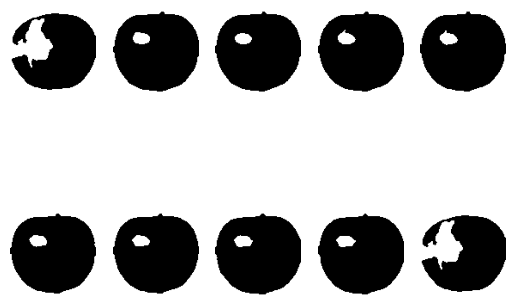

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imgaug.augmenters as iaa

# If you want to save processed images to Google Drive, you need to mount your drive.
# To mount Google Drive, run this code and follow the instructions:
# from google.colab import drive
# drive.mount('/content/drive')

input_img = "D:\Code\Python\TH_TXLDL\Fruits360_Lab4\Training"
output_dir = "D:\Code\Python\TH_TXLDL\out_data"

def resize_image(image, width=None, height=None):
    if width is None and height is None:
        return image
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def reduce_noise(image):
    denoised = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised

def correct_color(image):
    corrected_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return corrected_image

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(image)
    return enhanced

def segment_image(image):
    ret, segmented = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return segmented

def adjust_lighting(image, alpha=1.0, beta=0):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def augment_data(images):
    augmenter = iaa.Sequential([
        iaa.Fliplr(0.5),  # 50% horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # crop images from each side by 0 to 10% width
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),  # apply Gaussian blur with sigma between 0 and 0.5
    ])
    augmented_images = augmenter.augment_images(images)
    return augmented_images

def normalize_image(image):
    normalized = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized

list_img = []

for folder_name in os.listdir(input_img):
    folder_path = os.path.join(input_img, folder_name)

    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)

        img_resize = resize_image(img, width=100, height=100)
        img_reduce_noise = reduce_noise(img_resize)
        img_correct_color = correct_color(img_reduce_noise)
        img_enhance_contrast = enhance_contrast(img_correct_color)
        img_segment = segment_image(img_enhance_contrast)
        img_adjust_lighting = adjust_lighting(img_segment)

        list_img.append(img_adjust_lighting)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(list_img[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Display the first processed image
plt.imshow(cv2.cvtColor(list_img[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


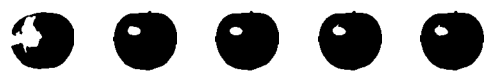

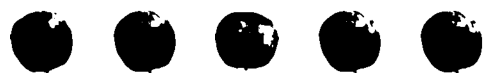

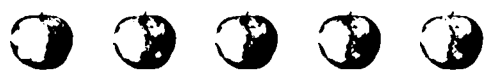

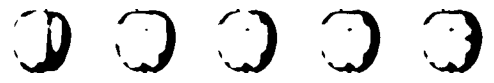

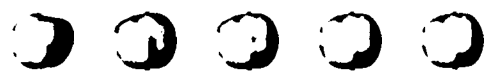

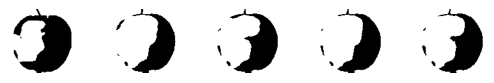

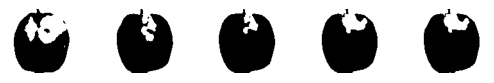

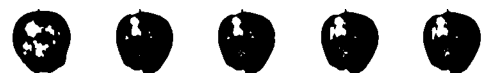

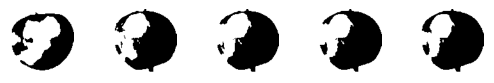

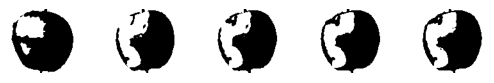

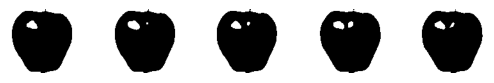

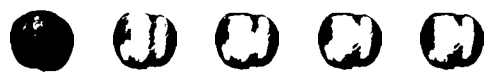

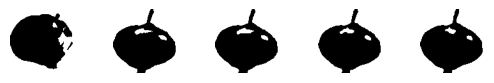

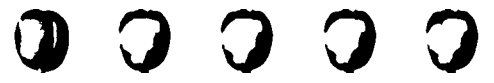

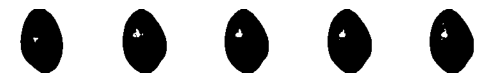

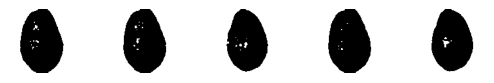

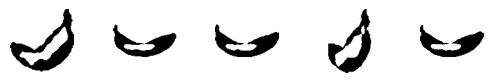

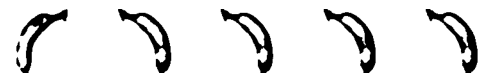

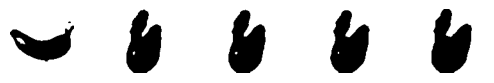

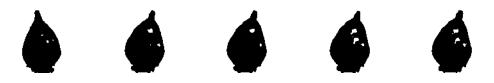

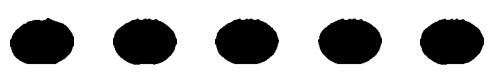

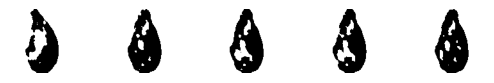

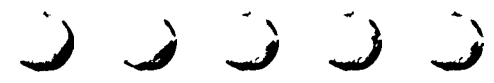

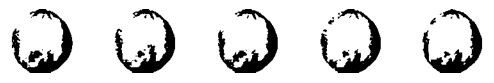

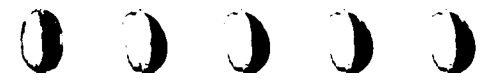

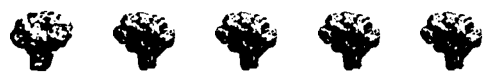

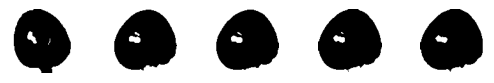

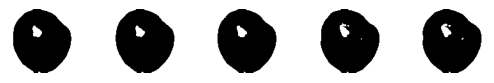

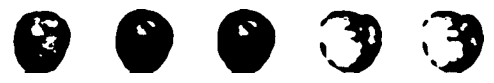

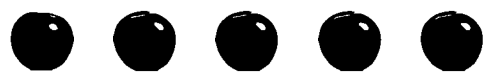

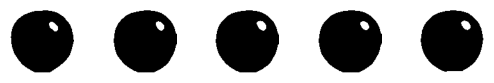

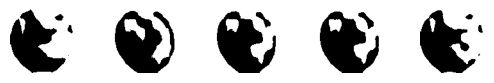

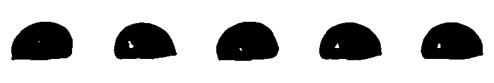

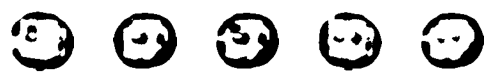

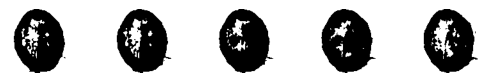

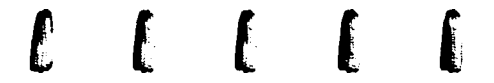

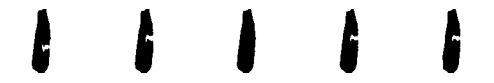

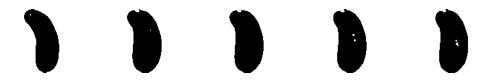

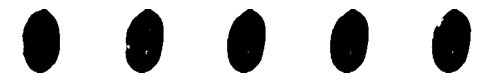

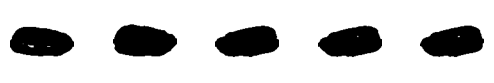

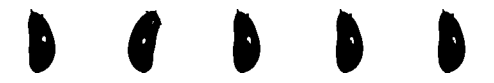

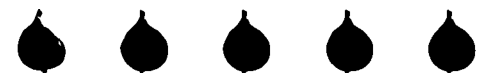

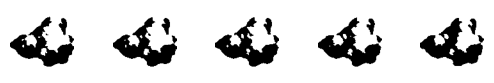

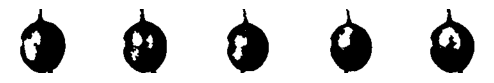

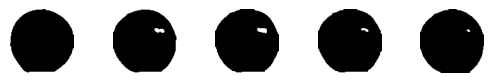

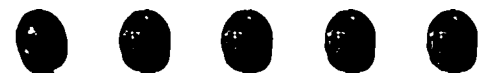

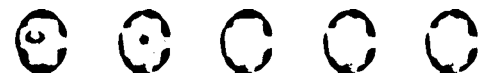

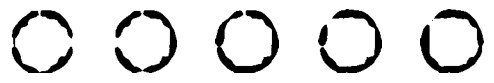

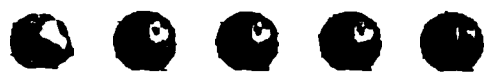

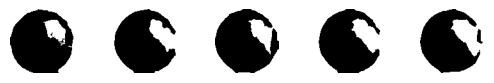

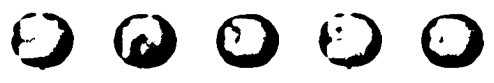

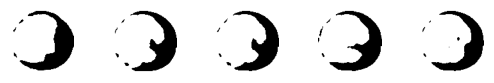

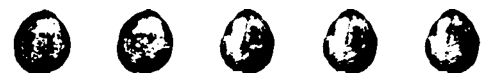

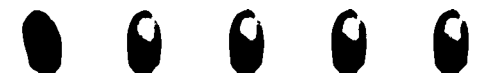

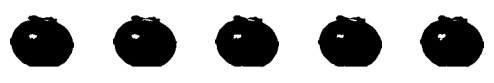

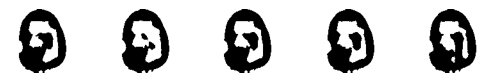

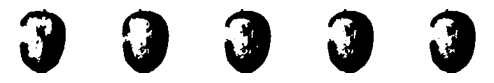

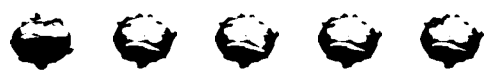

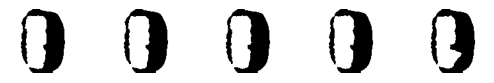

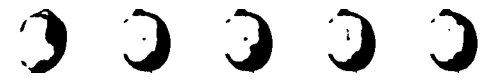

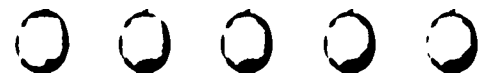

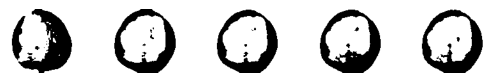

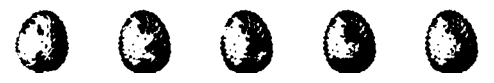

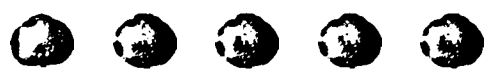

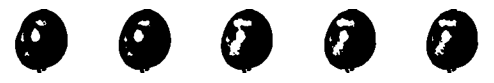

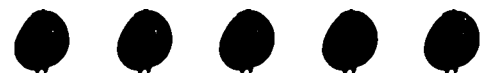

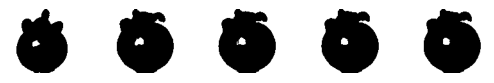

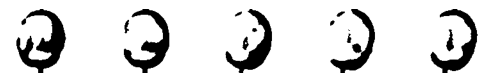

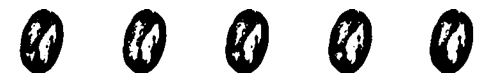

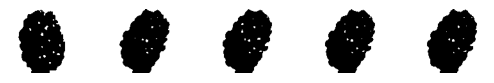

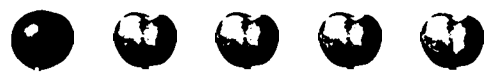

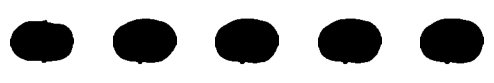

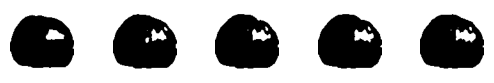

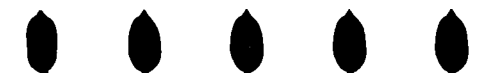

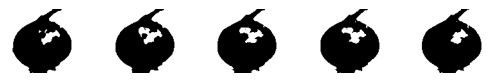

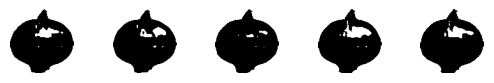

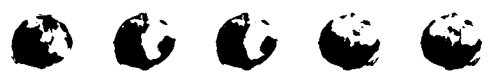

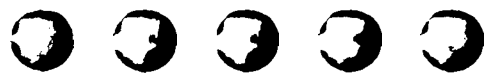

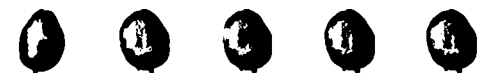

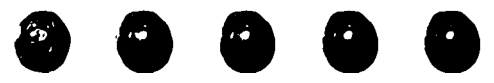

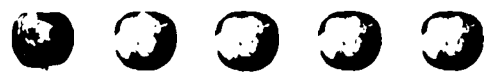

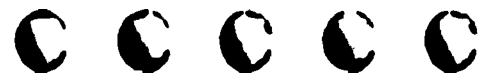

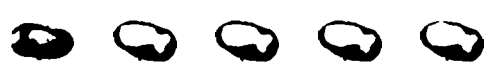

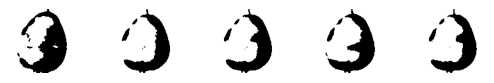

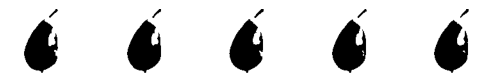

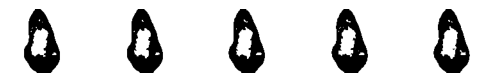

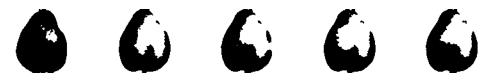

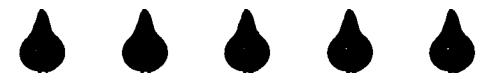

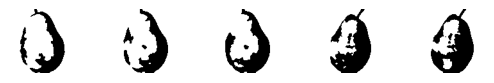

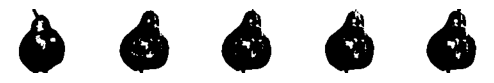

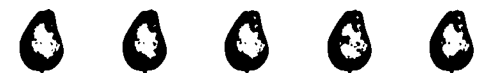

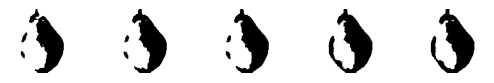

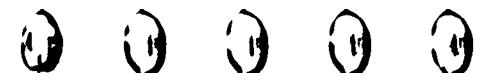

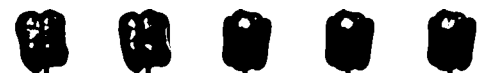

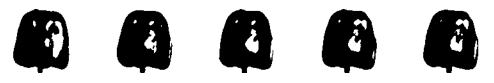

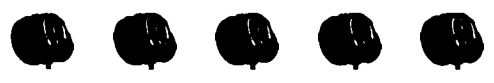

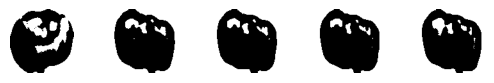

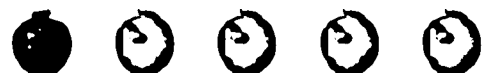

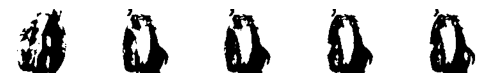

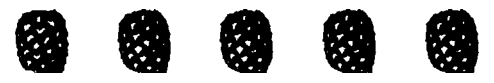

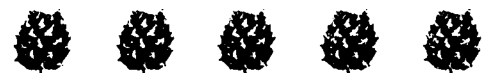

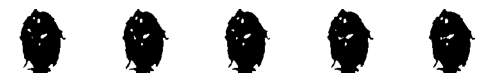

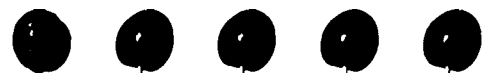

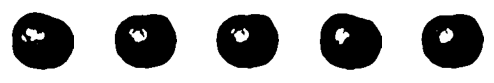

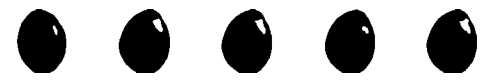

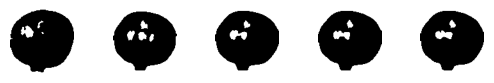

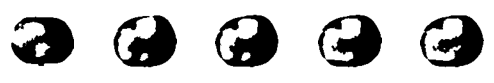

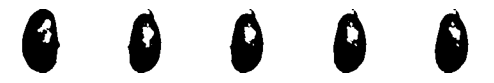

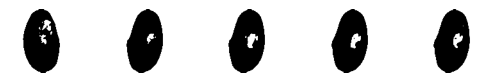

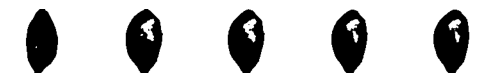

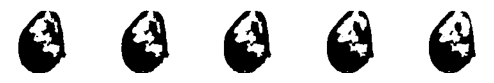

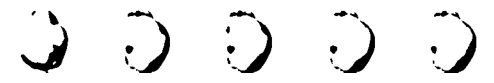

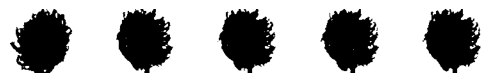

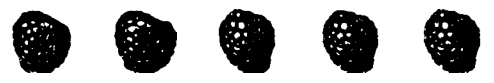

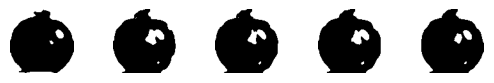

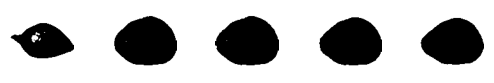

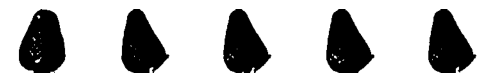

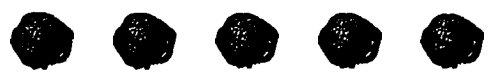

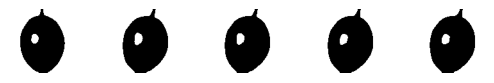

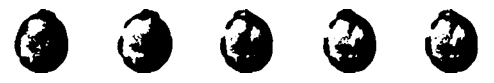

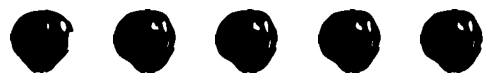

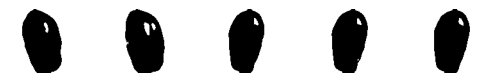

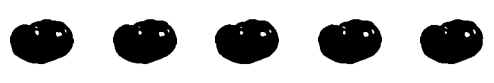

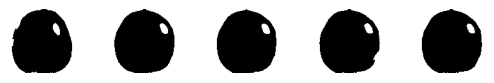

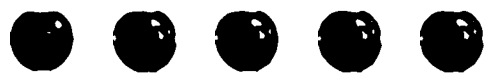

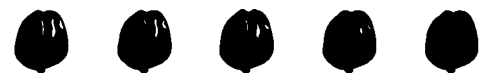

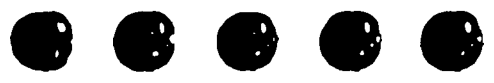

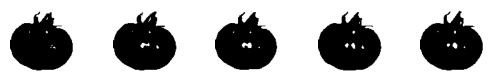

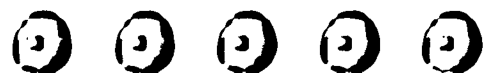

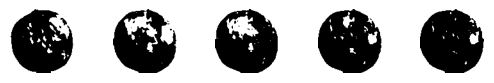

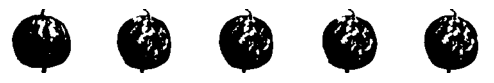

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imgaug.augmenters as iaa

# If you want to save processed images to Google Drive, you need to mount your drive.
# To mount Google Drive, run this code and follow the instructions:
# from google.colab import drive
# drive.mount('/content/drive')

input_img = "D:\Code\Python\TH_TXLDL\Fruits360_Lab4\Training"

def resize_image(image, width=None, height=None):
    if width is None and height is None:
        return image
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def reduce_noise(image):
    denoised = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised

def correct_color(image):
    corrected_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return corrected_image

def enhance_contrast(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(image)
    return enhanced

def segment_image(image):
    ret, segmented = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return segmented

def adjust_lighting(image, alpha=1.0, beta=0):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def augment_data(images):
    augmenter = iaa.Sequential([
        iaa.Fliplr(0.5),  # 50% horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # crop images from each side by 0 to 10% width
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),  # apply Gaussian blur with sigma between 0 and 0.5
    ])
    augmented_images = augmenter.augment_images(images)
    return augmented_images

def normalize_image(image):
    normalized = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized

# ... (previous code)

list_img = []

# Ensure that input_img is a directory
if os.path.isdir(input_img):
    for folder_name in os.listdir(input_img):
        folder_path = os.path.join(input_img, folder_name)

        if os.path.isdir(folder_path):
            images_in_folder = []

            for file_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file_name)

                # Error handling
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        print(f"Failed to read image: {img_path}")
                        continue

                    img_resize = resize_image(img, width=100, height=100)
                    img_reduce_noise = reduce_noise(img_resize)
                    img_correct_color = correct_color(img_reduce_noise)
                    img_enhance_contrast = enhance_contrast(img_correct_color)
                    img_segment = segment_image(img_enhance_contrast)
                    img_adjust_lighting = adjust_lighting(img_segment)

                    images_in_folder.append(img_adjust_lighting)
                except Exception as e:print(f"Error processing image {img_path}: {e}")

            # Display the first 5 processed images for each category
            for i in range(min(5, len(images_in_folder))):
                plt.subplot(5, 5, i + 1)
                plt.imshow(images_in_folder[i], cmap='gray')  # Use cmap='gray' for grayscale images
                plt.axis('off')

            plt.show()

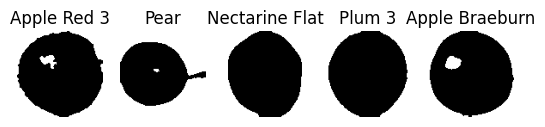

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split

# Input directory containing images
input_img = "D:\Code\Python\TH_TXLDL\Fruits360_Lab4\Training"

# Define a function to process and augment the images
def preprocess_and_augment_data(input_folder):
    images = []
    labels = []

    # Ensure that input_img is a directory
    if os.path.isdir(input_folder):
        for folder_name in os.listdir(input_folder):
            folder_path = os.path.join(input_folder, folder_name)

            if os.path.isdir(folder_path):
                for file_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, file_name)

                    # Error handling
                    try:
                        img = cv2.imread(img_path)
                        if img is None:
                            print(f"Failed to read image: {img_path}")
                            continue

                        # Image Preprocessing
                        img_resize = resize_image(img, width=100, height=100)
                        img_reduce_noise = reduce_noise(img_resize)
                        img_correct_color = correct_color(img_reduce_noise)
                        img_segment = segment_image(img_correct_color)
                        img_adjust_lighting = adjust_lighting(img_segment)

                        images.append(img_adjust_lighting)
                        labels.append(folder_name)  # Use the folder name as the label

                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")

    return images, labels

def resize_image(image, width=None, height=None):
    if width is None and height is None:
        return image
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def reduce_noise(image):
    denoised = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised

def correct_color(image):
    corrected_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return corrected_image

def segment_image(image):
    ret, segmented = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return segmented

def adjust_lighting(image, alpha=1.0, beta=0):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def augment_data(images):
    augmenter = iaa.Sequential([
        iaa.Fliplr(0.5),  # 50% horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # crop images from each side by 0 to 10% width
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),  # apply Gaussian blur with sigma between 0 and 0.5
    ])
    augmented_images = augmenter.augment_images(images)
    return augmented_images

def normalize_image(image):
    normalized = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized

# Load and preprocess the data
images, labels = preprocess_and_augment_data(input_img)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images
X_train_normalized = [normalize_image(img) for img in X_train]

# Placeholder for feature extraction - You should define your feature extraction process here.

# Visualize the first 5 processed and augmented images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_normalized[i], cmap='gray')
    plt.title(y_train[i])  # Display the label as the title
    plt.axis('off')

plt.show()
